In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
# # find genes expressed >= 1 TPM
# ab = '../talon/human_talon_abundance.tsv'
# df = pd.read_csv(ab, sep='\t')
# df, inds = get_tpm_table(df,
#                    how='gene',
#                    min_tpm=1,
#                    gene_subset='polya')


# gids = pd.DataFrame()
# gids['gene_id'] = inds
# gids = add_stable_gid(gids)

# o = 'talon_expressed_polya_1tpm_genes.tsv'
# gids.to_csv(o, sep='\t', index=False)

In [3]:
h5 = 'cerberus_annot.h5'
filt_ab = 'cerberus_filtered_abundance.tsv'
feat = 'tss'
obs_source = 'lapa'

## How many of our detected ends are supported by external data?

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1383: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1382: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 79265
# tsss >= 1 tpm: 70479
Applying gene type and novelty subset
Number of tsss reported: 67605


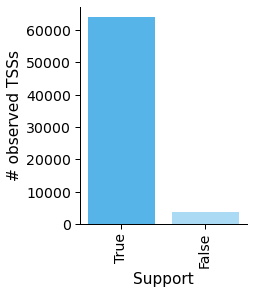

In [32]:
plot_supported_feats(filt_ab=filt_ab,
                     h5=h5,
                     feat=feat,
                     obs_source=obs_source,
                     how=feat,
                     opref='figures/human',
                     gene_subset='polya',
                     min_tpm=1)

In [31]:
def plot_supported_feats(filt_ab,
                         h5,
                         feat,
                         obs_source,
                         opref,
                         **kwargs):
    """
    """
    # get detected features
    df = pd.read_csv(filt_ab, sep='\t')
    df, ids = get_tpm_table(df, **kwargs)
    
    # get these features from cerberus
    ca = cerberus.read(h5)
    df = ca.tss.loc[ca.tss.Name.isin(ids)]
    
    # get T/F detection of each feat by each source
    df = upsetplot.from_memberships(df.source.str.split(','), data=df)    
    df.reset_index(inplace=True)
    
    # which sources are observed and which are supporting data
    sources = ca.get_sources(df)
    support_sources = [s for s in sources if s != obs_source]
    
    # which feats have support externally
    df = df[support_sources].any(axis=1).to_frame()    
    df['temp'] = df.index.tolist()
    df = df.groupby(0).count().reset_index()
    df.rename({0: 'supported', 
               'temp': 'counts'}, axis=1, inplace=True)
    
    # colors
    c_dict, order = get_support_sector_colors(sector=feat)    
    
    # plotting
    sns.set_context('paper', font_scale=1.6)
    plt.figure(figsize=(3,4))


    ax = sns.barplot(data=df, y='counts', x='supported',
                     palette=c_dict, order=order,
                     saturation=1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    xlabel = 'Support'
    ylabel = '# observed TSSs'

    _ = ax.set(xlabel=xlabel, ylabel=ylabel)
    ax.tick_params(axis="x", rotation=90)


    fname = '{}_{}_support.png'.format(opref, feat)
    plt.savefig(fname, dpi=500, bbox_inches='tight')

In [7]:
# get detected TSSs
df = pd.read_csv(filt_ab, sep='\t')
df, ids = get_tpm_table(df,
               how=feat,
               gene_subset='polya',
               min_tpm=1)

Calculating tss TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1383: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1382: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tsss detected: 79265
# tsss >= 1 tpm: 70479
Applying gene type and novelty subset
Number of tsss reported: 67605


In [8]:
ca = cerberus.read(h5)
df = ca.tss.loc[ca.tss.Name.isin(ids)]

In [9]:
df = upsetplot.from_memberships(df.source.str.split(','), data=df)

In [10]:
df.reset_index(inplace=True)
df.head()

,dels,encode_cage,encode_rampage,fantom_cage,lapa,pels,pls,v29,v40,Chromosome,Start,End,Strand,Name,source,novelty,gene_id,tss
0,False,True,True,True,True,False,True,True,True,chr1,169794989,169795129,+,ENSG00000000460_1,"v40,v29,lapa,lapa,encode_cage,fantom_cage,enco...",Known,ENSG00000000460,1
1,False,False,False,False,True,False,True,True,True,chr1,169795358,169795459,+,ENSG00000000460_2,"v40,v29,lapa,pls",Known,ENSG00000000460,2
2,False,False,False,False,True,False,True,True,True,chr1,169794679,169794780,+,ENSG00000000460_3,"v40,v29,lapa,lapa,pls",Known,ENSG00000000460,3
3,False,True,True,True,True,False,True,True,True,chr1,196651703,196652106,+,ENSG00000000971_1,"v40,v29,lapa,lapa,encode_cage,fantom_cage,enco...",Known,ENSG00000000971,1
4,False,False,False,False,True,False,False,True,True,chr1,196676937,196677038,+,ENSG00000000971_3,"v40,v29,lapa",Known,ENSG00000000971,3


In [11]:
sources = ca.get_sources(df)
support_sources = [s for s in sources if s != obs_source]

In [12]:
support_sources

['pels',
 'fantom_cage',
 'encode_cage',
 'v29',
 'encode_rampage',
 'v40',
 'pls',
 'dels']

In [13]:
df = df[support_sources].any(axis=1).to_frame()

In [14]:
df['temp'] = df.index.tolist()
df

,0,temp
0,True,0
1,True,1
2,True,2
3,True,3
4,True,4
...,...,...
67600,True,67600
67601,True,67601
67602,True,67602
67603,True,67603


In [15]:
df = df.groupby(0).count().reset_index()
df.rename({0: 'supported', 
           'temp': 'counts'}, axis=1, inplace=True)

In [16]:
df.head()

,supported,counts
0,False,3645
1,True,63960


In [17]:
c_dict, order = get_support_sector_colors(sector=feat)

In [17]:
c_dict

{'tss_False': '#abdaf4', 'tss_True': '#56b4e9'}

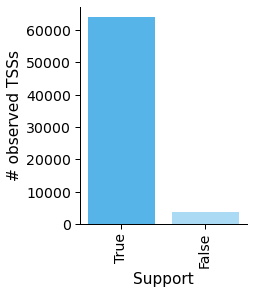

In [25]:
sns.set_context('paper', font_scale=1.6)
plt.figure(figsize=(3,4))


ax = sns.barplot(data=df, y='counts', x='supported',
                 palette=c_dict, order=order,
                 saturation=1)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = 'Support'
ylabel = '# observed TSSs'

_ = ax.set(xlabel=xlabel, ylabel=ylabel)
ax.tick_params(axis="x", rotation=90)


# fname = '{}_isos_per_gene_per_{}.png'.format(opref, sample)
# plt.savefig(fname, dpi=500, bbox_inches='tight')

## How do cerberus sources overlap our ends?

In [60]:
h5 = 'cerberus_annot.h5'
mode = 'tss'
subset = 'polya'
o = 'talon_expressed_polya_1tpm_genes.tsv'
gids = pd.read_csv(o, sep='\t').gene_id.tolist()

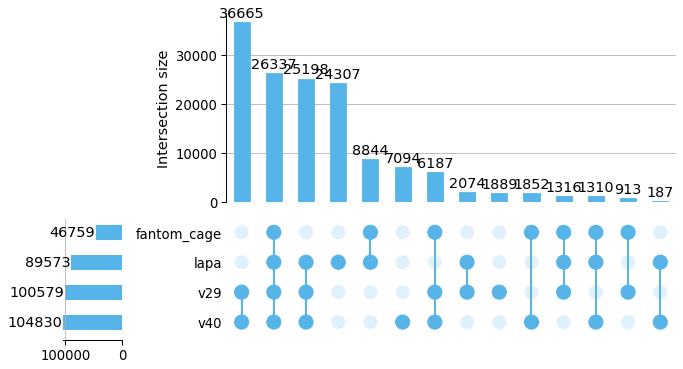

In [53]:
sources = ['v40', 'v29', 'lapa', 'fantom_cage']
df = plot_end_upset(h5, mode,
               subset=subset,
               sources=sources,
               gids=gids)

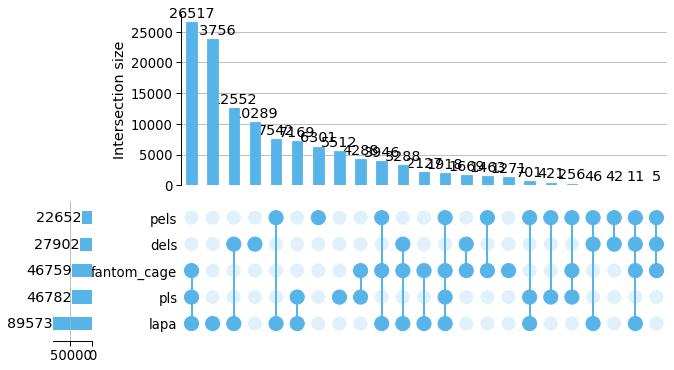

In [8]:
h5 = 'cerberus_annot.h5'
mode = 'tss'
subset = 'polya'
sources = ['pls', 'pels', 'dels', 'lapa', 'fantom_cage']
_ = plot_end_upset(h5, mode,
               subset=subset,
               sources=sources,
               gids=gids)

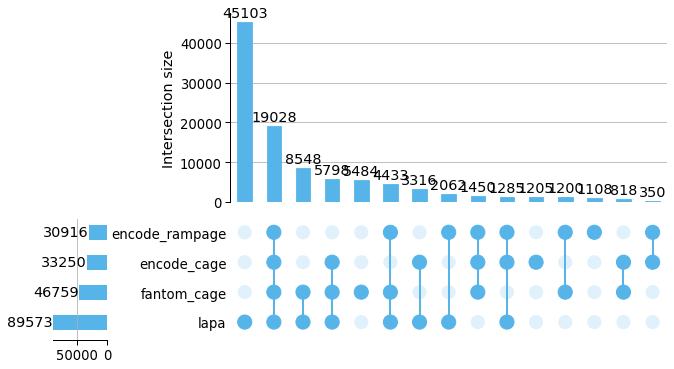

In [9]:
h5 = 'cerberus_annot.h5'
mode = 'tss'
subset = 'polya'
sources = ['encode_cage', 'encode_rampage', 'lapa', 'fantom_cage']
_ = plot_end_upset(h5, mode,
               subset=subset,
               sources=sources,
               gids=gids)

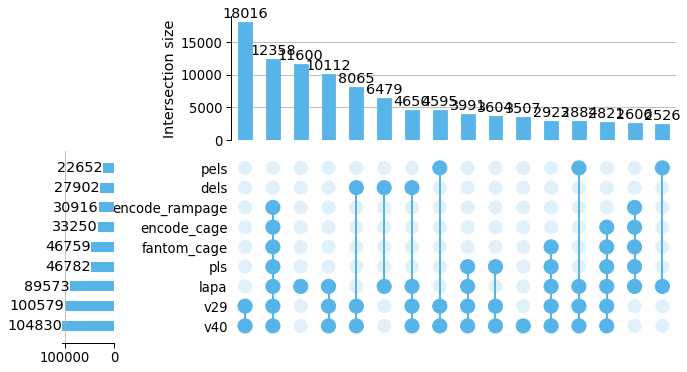

In [45]:
h5 = 'cerberus_annot.h5'
mode = 'tss'
subset = 'polya'
df = plot_end_upset(h5, mode,
               subset=subset,
               gids=gids,
               min_subset_size=2500)

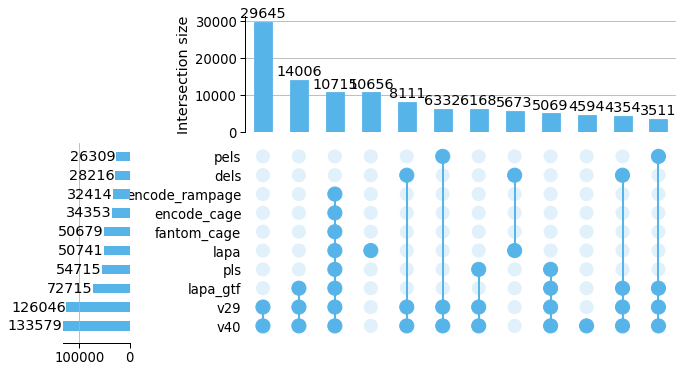

In [44]:
h5 = 'cerberus_ref_lapa_gtf.h5'
mode = 'tss'
subset = 'polya'
df = plot_end_upset(h5, mode,
               min_subset_size=2500)

## scratch

In [104]:
# # find genes expressed >= 100 TPM
# ab = '../talon/human_talon_abundance.tsv'
# df = pd.read_csv(ab, sep='\t')
# df, inds = get_tpm_table(df,
#                    how='gene',
#                    min_tpm=100,
#                    gene_subset='polya')


# gids = pd.DataFrame()
# gids['gene_id'] = inds
# gids = add_stable_gid(gids)

# o = 'talon_expressed_polya_100tpm_genes.tsv'
# gids.to_csv(o, sep='\t', index=False)

In [106]:
o = 'talon_expressed_polya_100tpm_genes.tsv'
gids = pd.read_csv(o, sep='\t').gene_id.tolist()

In [107]:
h5 = 'cerberus_ref.h5'
ic, tss, tes, tss_map, tes_map, m_df = read_h5(h5, as_pyranges=False)

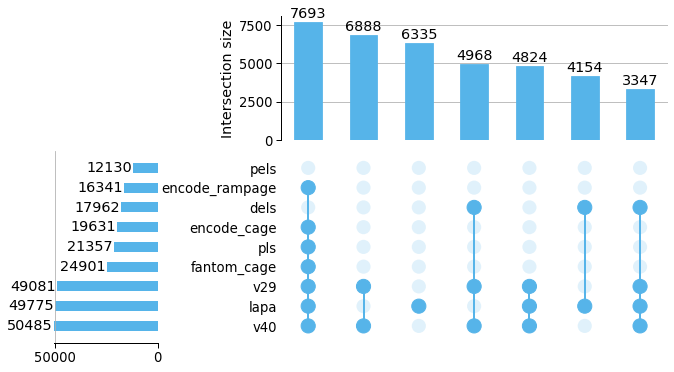

In [108]:
h5 = 'cerberus_ref.h5'
mode = 'tss'
subset = 'polya'
df = plot_end_upset(h5, mode,
               gids=gids,
               min_subset_size=2500)

In [109]:
cols = list(df.index.names)
df.reset_index(inplace=True)
inds = df.loc[(df[cols].sum(axis=1) == 1)&(df.lapa == True)].index
df['supported'] = True
df.loc[inds, 'supported'] = False

In [119]:
df.loc[df.supported==False].iloc[500]

dels                          False
encode_cage                   False
encode_rampage                False
fantom_cage                   False
lapa                           True
pels                          False
pls                           False
v29                           False
v40                           False
Chromosome                     chr1
Start                       6601882
End                         6601883
Strand                            -
Name              ENSG00000162413_5
source                    lapa,lapa
gene_id             ENSG00000162413
tss                               5
supported                     False
Name: 5820, dtype: object

In [122]:
tss_map.loc[(tss_map.Chromosome=='chr1')&(tss_map.End==6601837)]

,Chromosome,Start,End,Strand,source,Name
79976,chr1,6601633,6601837,NaN,pels,NaN


## How many annotated ends do we detect?

In [24]:
ic, tss, df, _, _, m_df = read_h5(h5, as_pyranges=False)

g_df, _, _ = get_gtf_info(how='gene', subset='polya', add_stable_gid=True)
gids = g_df.gid_stable.tolist()
df = df.loc[df.gene_id.isin(gids)]

df['source'] = df.source.str.split(',')
df = df.explode('source')

# get rid of dupes that resulted from two sources named lapa
df = df.drop_duplicates()

counts = df[['Name', 'source']].groupby('source').count()
counts.rename({'Name': 'count'}, axis=1, inplace=True)

In [14]:
n_talon = counts.loc['lapa', 'count']
n_v29 = counts.loc['v29', 'count']
n_v40 = counts.loc['v40', 'count']

In [15]:
print('Detected {:.2f}% of v40 TESs'.format((n_talon/n_v40)*100))
print('Detected {:.2f}% of v29 TESs'.format((n_talon/n_v29)*100))

Detected 59.81% of v40 TESs
Detected 63.25% of v29 TESs


## How many ends does each gene have in our entire annotation?

In [32]:
def plot_n_ends_per_gene(annot, mode,
                         sources=None,
                         subset=None,
                         max_ends=10):
    """
    Parameters:
        annot (str): Path to cerberus reference
        mode (str): {'tss', 'tes'}
        subset (str): Which genes to include {None, 'protein_coding', 'polya', 'tf'}
        max_ends (int): Max # of ends
        
    """
    ic, tss, tes, tss_map, tes_map, m_df = read_h5(annot, as_pyranges=False)
    if mode == 'tss':
        df = tss
    elif mode == 'tes':
        df = tes
    
    # filter based on sources
    if sources: 
        df = filter_cerberus_sources(df, sources)
       
    
    df = df[['gene_id', 'Name']]
    df = df.groupby('gene_id').count().reset_index()
    df.rename({'Name': 'n_{}'.format(mode)}, axis=1, inplace=True)
    
    if subset:
        df = filter_cerberus_genes(df, subset=subset)
          
    # create counts df
    df = df.groupby('n_{}'.format(mode)).count().reset_index()
    df.rename({'gene_id': 'n_genes'}, axis=1, inplace=True)
    n = df.loc[df['n_{}'.format(mode)] >= max_ends, 'n_genes'].sum()
    df = df.loc[df['n_{}'.format(mode)] < max_ends]
    temp = pd.DataFrame()
    temp['n_{}'.format(mode)] = ['{}+'.format(max_ends)]
    temp['n_genes'] = [n]
    df = pd.concat([df, temp])
                    
    # plot
    plt.figure(figsize=(4.5, 3), dpi=300)
    c_dict, order = get_end_colors()

    ax = sns.barplot(data=df, 
                x='n_{}'.format(mode), y='n_genes',
                color=c_dict[mode], saturation=1)

    plt.xlabel('# {}s'.format(mode.upper()))
    plt.ylabel('# genes')
    sns.despine()

In [33]:
h5 = 'cerberus_ref.h5'
ic, tss, tes, tss_map, tes_map, m = read_h5(h5, as_pyranges=False)

In [34]:
df = pd.read_hdf(h5, 'tss_map')
df.head()

,Chromosome,Start,End,Strand,source,Name
0,SIRV1,10314,10416,-,lapa,ENCODEHG000058837_1
1,SIRV1,10588,10840,-,lapa,ENCODEHG000058837_2
2,SIRV1,10597,10763,+,lapa,ENCODEHG000058846_1
3,SIRV2,4713,4814,-,lapa,ENCODEHG000058784_1
4,SIRV2,5855,5956,-,lapa,ENCODEHG000058784_2


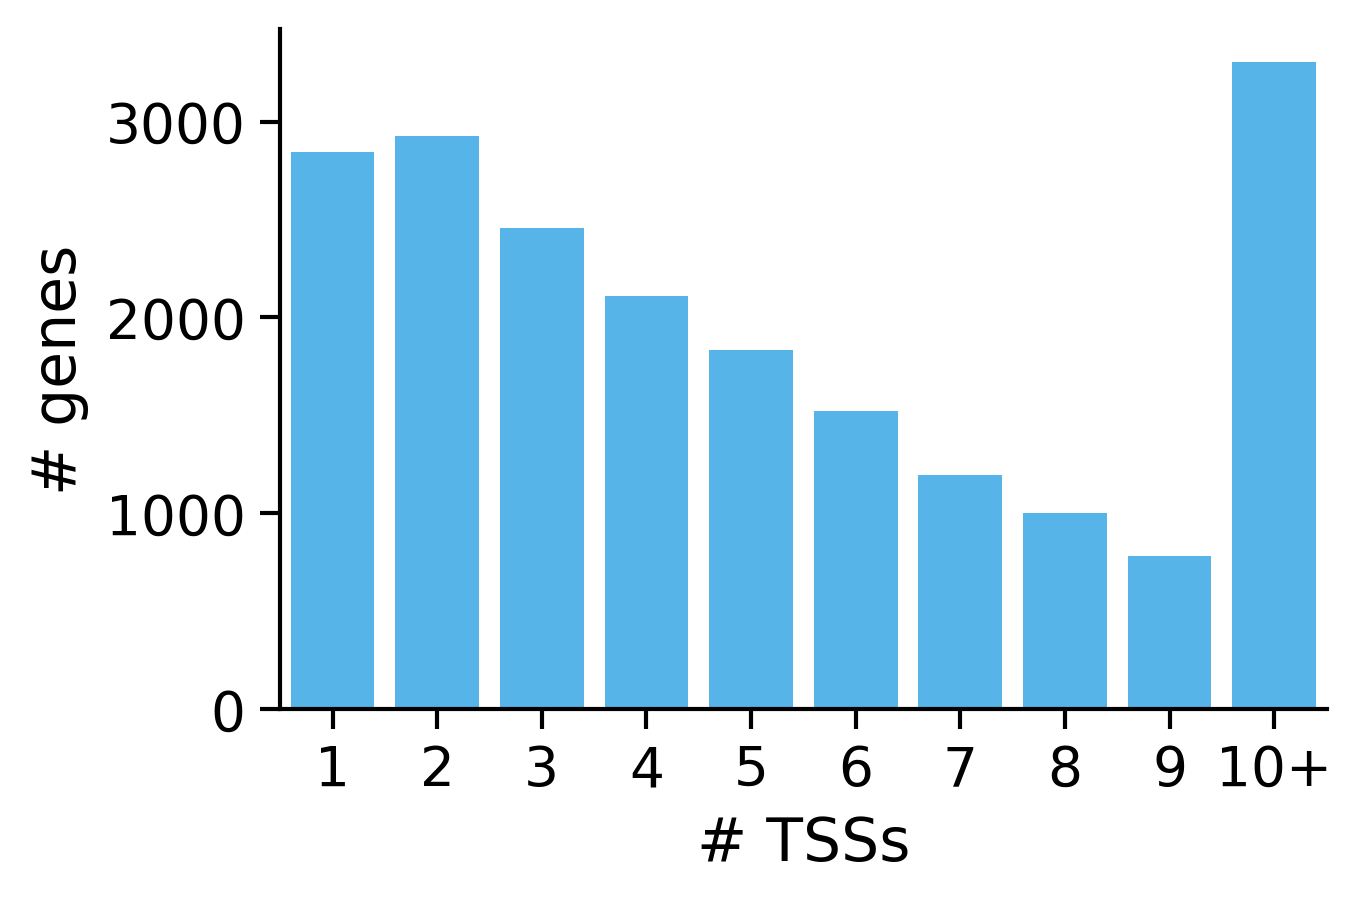

In [35]:
# all ends observed in our data + annotated in GENCODE v29 or 40
h5 = 'human_cerberus.h5'
plot_n_ends_per_gene(h5,
                     mode='tss',
                     subset='protein_coding',
                     max_ends=10)

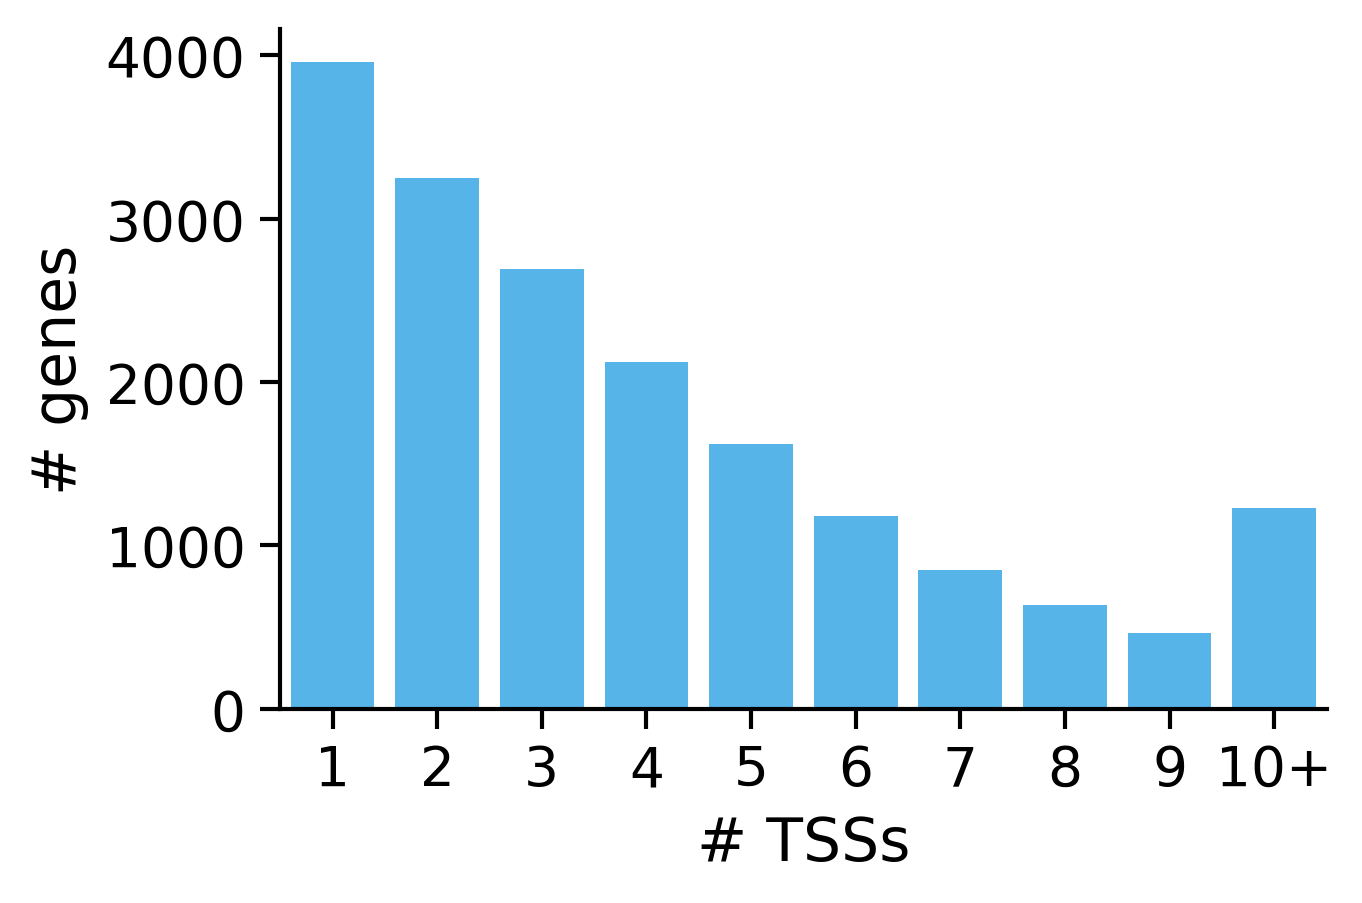

In [36]:
# all ends observed in our data
h5 = 'human_cerberus.h5'
plot_n_ends_per_gene(h5,
                     mode='tss',
                     subset='protein_coding',
                     sources=['lapa'],
                     max_ends=10)

## How many intron chains from the same gene have a different TES? 

In [37]:
def plot_ends_per_ic(h5, mode, subset=None, opref='figures/human'):
    _, _, _, _, _, df = read_h5(h5, as_pyranges=False)
    end_id = '{}_id'.format(mode)
    
    sns.set_context('paper', font_scale=1.8)
    
    
    if subset:
        df = filter_cerberus_genes(df, subset)
    
    # df counting
    # df[['gene_id', 'ic_id', end_id]].head()
    df = df[['gene_id', 'ic_id', end_id]]
    df = df.groupby(['gene_id', 'ic_id']).count().reset_index()
    df.rename({end_id: 'counts'}, axis=1, inplace=True)
    df.sort_values(by='counts', ascending=False)

    # plotting
    c_dict, order = get_end_colors()
    c = c_dict[mode]
    ax = sns.displot(df, x='counts', kind='hist', binwidth=1, linewidth=0, color=c)
    
    xlabel = '# intron chains'
    ylabel = '# {}s'.format(mode.upper())

    _ = ax.set(xlabel=xlabel, ylabel=ylabel)
    fname = '{}_{}s_per_ic.png'.format(opref, mode)
    plt.savefig(fname, dpi=300, bbox_inches='tight') 

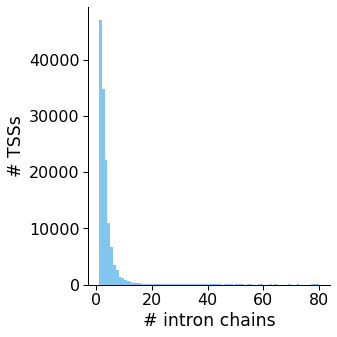

In [39]:
h5 = 'human_cerberus.h5'
plot_ends_per_ic(h5, 'tss', subset='protein_coding')

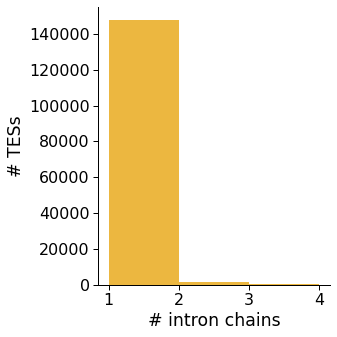

In [17]:
h5 = 'v29_cerberus.h5'
plot_ends_per_ic(h5, 'mode', subset='protein_coding', opref='figures/v29')

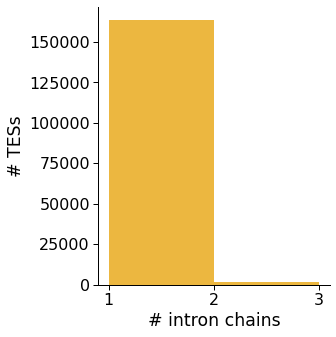

In [18]:
h5 = 'v40_cerberus.h5'
plot_ends_per_ic(h5, 'tes', subset='protein_coding', opref='figures/v40')

## How many ends to we detect per gene compared to GENCODE?

In [94]:
h5 = 'human_cerberus.h5'
mode = 'tes'
source1 = 'v40'
source2 = 'lapa'
xlim=None
ylim=None
label_genes=None
opref= 'figures/human'

_, tss, tes, _, _, _ = read_h5(h5, as_pyranges=False)
if mode == 'tss':
    df = tss
elif mode == 'tes':
    df = tes

In [95]:
s1_ends = df.loc[df.source.str.contains(source1)].copy(deep=True)
s2_ends = df.loc[df.source.str.contains(source2)].copy(deep=True)

In [96]:
def get_ends_per_gene(df):
    df = df[['gene_id', 'Name']]
    df = df.groupby('gene_id').count().reset_index()
    df.rename({'Name': 'counts'}, axis=1, inplace=True)
    return df

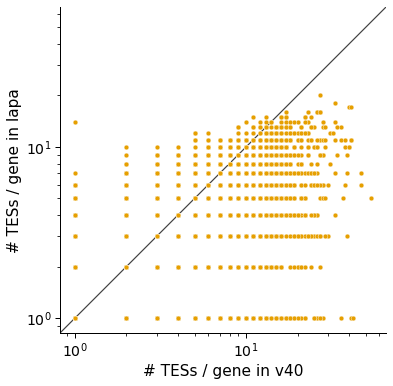

In [97]:
s1_ends = get_ends_per_gene(s1_ends)
s2_ends = get_ends_per_gene(s2_ends)

# merge but only keep entries that we have in both sources
df = s1_ends.merge(s2_ends, how='inner', on='gene_id', 
                   suffixes=('_s1', '_s2'))

c_dict, order = get_end_colors()
c = c_dict[mode]

# plot the figure
sns.set_context('paper', font_scale=1.6)
plt.figure(figsize=(6,6))
ax = sns.scatterplot(data=df, x='counts_s1', y='counts_s2', color=c)

fig = plt.gcf()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

xlabel = '# {}s / gene in {}'.format(mode.upper(), source1)
ylabel = '# {}s / gene in {}'.format(mode.upper(), source2)
_ = ax.set(xlabel=xlabel, ylabel=ylabel, xscale='log', yscale='log')

fig = plt.gcf()

# set x and y lims if provided
if xlim:
    xlim = (0, xlim)
    ax.set(xlim=xlim)
if ylim:
    ylim = (0, ylim)
    ax.set(ylim=ylim)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

# annotate genes that are kinda interesting
if label_genes:
    xlim = ax.get_xlim()[1]
    ylim = ax.get_ylim()[1]
    for g in label_genes:
        if g in df.gname.tolist():
            x = df.loc[df.gname == g, 'counts_s1'].values[0]
            y = df.loc[df.gname == g, 'counts_s2'].values[0]
            if x > 0.2 and y > 0.2:
                # https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate
                plt.annotate(g, (x,y), fontsize='small', fontstyle='italic', xytext=(4,-5), textcoords='offset pixels')

fname = '{}_{}_v_{}_{}s_per_gene.png'.format(opref, source1, source2, mode)
plt.savefig(fname, dpi=300, bbox_inches='tight')



In [98]:
df.head()

,gene_id,counts_s1,counts_s2
0,ENSG00000000003,4,6
1,ENSG00000000005,2,2
2,ENSG00000000419,6,4
3,ENSG00000000457,4,4
4,ENSG00000000460,5,4


## Sample specificty of 3' ends

In [1]:
import pandas as pd
import pyranges as pr
import upsetplot
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys

p = os.path.dirname(os.path.dirname(os.getcwd()))
sys.path.append(p)

from scripts.utils import *
from scripts.plotting import *

In [2]:
def read_cerberus_ab(df, 
                     mode):
    """
    Read cerberus abundance file and aggregate over whichever
    feature requested.
    
    Parameters:
        df (str): Path to cerberus abundance file
        mode (str): {'tss', 'ic', 'tes'}
    """
    df = pd.read_csv(df, sep='\t')
    
    # add stable gid
    df['gid_stable'] = df.annot_transcript_id.str.split('[', expand=True)[0]
    
    # extract triplet
    df['triplet'] = df.annot_transcript_id.str.split('[', expand=True)[1]
    df['triplet'] = df.triplet.str.split(']', expand=True)[0]
    df[['tss', 'ic', 'tes']] = df.triplet.str.split(',', expand=True)
    df['triplet'] = df.triplet.str.split(',')
    
    # create id for feature we care about
    df[mode] = df.gid_stable+'_'+df[mode].astype(str)
    
    # drop columns that are irrelevant for end / ic analysis
    drop_cols = ['transcript_ID', 'annot_transcript_id', 'annot_transcript_name',
                 'n_exons', 'length', 'transcript_novelty', 'ISM_subtype']
    drop_cols += list({'tss', 'ic', 'tes'}-set([mode]))
    df.drop(drop_cols, axis=1, inplace=True)
    
    # groupby unique features to ends or ic; sum across transcripts
    gb_cols = ['gene_ID', 'annot_gene_id', 'annot_gene_name', 'gene_novelty', mode]
    # print(df.loc[df[mode] == 'ENSG00000227232_1'].head())
    df = df.groupby(gb_cols).sum().reset_index()
    
    return df    

In [3]:
ab = 'human_cerberus_abundance.tsv'
df = read_cerberus_ab(ab, 'tes')

Calculating tes TPM values
Subsetting for polya genes


/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1108: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tpm_col] = (df[d]*1000000)/df[total_col]
/Users/fairliereese/Documents/programming/mortazavi_lab/data/rnawg/scripts/utils.py:1107: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df[total_col] = df[d].sum()


Enforcing minimum TPM
Total # tess detected: 62620
# tess >= 1 tpm: 62620
Applying gene type and novelty subset
Number of tess reported: 62620
Found 50 total samples


UnboundLocalError: local variable 'ylabel' referenced before assignment

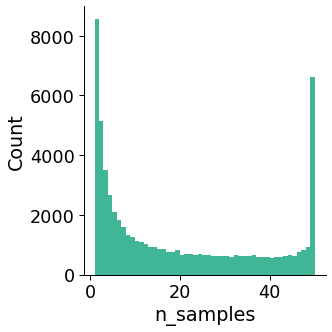

In [4]:
# can I get tpm table??? o.o
df = plot_biosamp_det(df, how='tes', sample='all', groupby='sample', gene_subset='polya', opref='figures/human', nov=None)

In [ ]:
df.head()

In [5]:
df.head()

,gene_ID,annot_gene_id,annot_gene_name,gene_novelty,tes,hl60_m2_12hr_1_1,pgp1_excite_neuron_1_2,h9_neural_crest_1_1,gm12878_1_4,wtc11_1_1,...,left_lung_2_1,hmec_1_1,mcf10a_1_1,calu3_1_2,adrenal_gland_3_1,heart_right_ventricle_1_1,right_lobe_of_liver_1_1,huvec_1_2,hl60_m1_12hr_1_1,pgp1_excite_neuron_1_1
0,2,ENSG00000227232.5,WASH7P,Known,ENSG00000227232_1,14,1,0,0,4,...,0,6,2,12,0,1,0,11,19,0
1,4,ENSG00000243485.5,MIR1302-2HG,Known,ENSG00000243485_1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6,ENSG00000237613.2,FAM138A,Known,ENSG00000237613_1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,ENSG00000237613.2,FAM138A,Known,ENSG00000237613_2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10,ENSG00000238009.6,AL627309.1,Known,ENSG00000238009_5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
